# Seminar Python 4: Pachetul scikit-learn

Exemplu instalare pachet scikit-learn: în (Windows) Command prompt / (UNIX) fereastră Terminal / shell se rulează:
`pip install scikit-learn`

Similar și pentru alte pachete Python: scipy, six, cycler, pyparsing, kiwisolver, python-dateutil, matplotlib, pytz, pandas, seaborn, numpy, sklearn, statsmodels etc.  
După caz, poate fi necesar upgrade-ul PIP (Python package installer) - v. mai multe detalii pe https://datatofish.com/upgrade-pip/

In [ ]:
#Verificare pachet/modul instalat (tratare excepție în caz de eșec import cu try...except)
try:                 
    import sklearn
    print('Import OK.')
except ImportError as err: 
    print(err)

In [ ]:
#instalare in Jupyter Lab: #"comandă magică" IPython, rulează în shell
%pip install scikit-learn

## Clusterizare K-Means în Python cu pachetul scikit-learn
Metoda de clusterizare K-means realizează gruparea observațiilor dintr-un set de date într-un număr de K "clustere" - grupuri de observații care prezintă similarități.

In [1]:
#Exemplu 1. Gruparea unui set de valori în 3 clustere
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91]])
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
f1 = plt.figure()
plt.scatter(X[:,0],X[:,1], label='True Position')
f2 = plt.figure()
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
f3 = plt.figure()
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

[[13.5  10.  ]
 [74.   79.75]
 [42.5  48.5 ]]
[0 0 0 0 2 1 1 1 2 1]


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Această metodă este utilizată în învățarea automată (_machine learning_) pentru a identifica clusterele pe baza unui set de antrenare (train); pe această bază se vor face predicții privind apartenența altor observații (din setul de test) la clusterele identificate (v. mai multe detalii [aici](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1))

**Aplicație**  
Scufundarea Titanicului în 1912 a dus la 1502 victime din cei 2224 pasageri și membri ai echipajului.
Se vor utiliza două seturi de date `train.csv` și `test.csv`, ce conțin informații legate de pasageri. Diferența majoră dintre cele două seturi la nivel de coloane constă în coloana `Survived`,  prezentă doar în setul de antrenare. Se poate considera că supraviețuirea a fost influențată de anumite atribute, cum ar fi vârsta, sexul, clasa biletului de călătorie etc. Pornind de la aceste caracteristici, se vor grupa (clusteriza) pasagerii din setul de date de antrenare în două clustere (supraviețuitori / nesupraviețuitori); pe baza acestora se vor face predicții privind apartenența pasagerilor din setul de test la unul dintre clustere.

In [2]:
#Exemplu 2. Pas 1. Import biblioteci
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Iulian\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Exemplu 2. Pas 2. Citirea fișierelor și afișarea primelor 5 înregistrări
pd.options.display.max_columns = 12
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

print('*****test*****')
print(test.head())
print('*****train*****')
print(train.head())

*****test*****
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         1  
1  47.0      1      0   363272   7.0000   NaN        S         0  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         1  
4  22.0      1      1  3101298  12.2875   NaN        S         0  
*****train*****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2

In [4]:
#Exemplu 2. Pas 3. Calcul statistici de bază
print('*****test_stats*****')
print(test.describe())
print('*****train_stats*****')
print(train.describe())

*****test_stats*****
       PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  332.000000  418.000000  418.000000   
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   
std     120.810458    0.841838   14.181209    0.896760    0.981429   
min     892.000000    1.000000    0.170000    0.000000    0.000000   
25%     996.250000    1.000000   21.000000    0.000000    0.000000   
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   
max    1309.000000    3.000000   76.000000    8.000000    9.000000   

             Fare    Survived  
count  417.000000  418.000000  
mean    35.627188    0.473684  
std     55.907576    0.499905  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.454200    0.000000  
75%     31.500000    1.000000  
max    512.329200    1.000000  
*****train_stats*****
       PassengerId    Survived      Pc

Anumiți algoritmi machine learning, inclusiv k-means, nu permit valori lipsă. Astfel, vor fi identificate valorile lipsă.

In [5]:
#Exemplu 2. Pas 4. Vizualizare denumire coloane din setul train și indentificare valori lipsă
print(train.columns.values)

print('*****train_ valori_lipsă *****')
print(train.isna())
print('*****test_valori_lipsă*****')
print(test.isna())

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
*****train_ valori_lipsă *****
     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  Fa

In [6]:
#Exemplu 2. Pas 5. Calcul număr valori lipsă pentru coloanele celor două seturi de date
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print('*****In the test set*****')
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [7]:
#Exemplu 2. Pas 6. Înlocuirea valorilor lipsă cu media coloanei, utilizând fillna()
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
print(train.isna().sum())
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [8]:
#Exemplu 2. Pas 7. Evaluarea supraviețuitorilor în funcție de Pclass, Sex, SibSp
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908


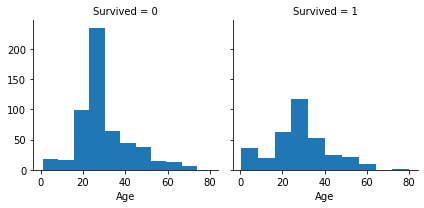

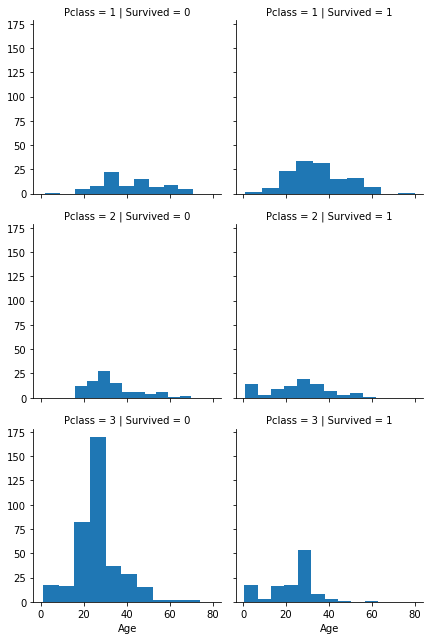

In [9]:
#Exemplu 2. Pas 8. Reprezentare grafică a coloanelor Age-Survived și Pclass-Survived
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age')
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age')
grid.add_legend()
plt.show()

In [10]:
#Exemplu 2. Pas 9. Afișarea informațiilor legate de setul de date train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Exemplu 2. Pas 10. Eliminarea coloanelor non-numerice care nu influențează supraviețuirea
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [12]:
#Exemplu 2. Pas 11. Transformarea tipului de dată a coloanei Sex
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch       

In [13]:
#Exemplu 2. Pas 12. Var. X este un vector (array din pachetul numpy) identic cu setul train,
# din care a fost ștearsă coloana Survived, iar y este un vector format din coloana Survived
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])

In [14]:
#Exemplu 2. Pas 13. Aplearea metodei Kmeans și setarea parametrului n_clusters = 2
# (supraviețuitori/nesupraviețuitori). 
kmeans = KMeans(n_clusters=2) 
#kmeans = KMeans(n_clusters=2, max_iter=600)
kmeans.fit(X)

#Alte setări (argumente) posibile pentru kmeans:
'''KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)'''

"KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,\n    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',\n    random_state=None, tol=0.0001, verbose=0)"

In [15]:
#Exemplu 2. Pas 14. Evaluarea rezultatelor
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


Modelul clusterizează correct cu o acuratețe de circa 50%.  
Pentru o îmbunățire a rezultatelor, se vor scala datele de intrare.  
Exemplul 2, pas 15: deschideți și rulați `Ex_2_15.ipynb`

In [ ]:
# --- NU EXECUTAȚI ACEASTĂ CELULĂ --- #
#Exemplu 2. Cod complet exemplu KMmeans - salvat și ca script (fișier) ex_2.py,
#pentru rulare separată (în fereastră Terminal / IDLE / PyCharm)

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 12
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

print('*****test*****')
print(test.head())
print('*****train*****')
print(train.head())

print('*****test_stats*****')
print(test.describe())
print('*****train_stats*****')
print(train.describe())

print(train.columns.values)

print(train.isna())
print(test.isna())

print('*****In the train set*****')
print(train.isna().sum())
print("\n")
print('*****In the test set*****')
print(test.isna().sum())

train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
print(train.isna().sum())
print(test.isna().sum())


print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age')
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age')
grid.add_legend()
plt.show()

train.info()

train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

train.info()

test.info()

X = np.array(train.drop(['Survived'], 1).astype(float))

y = np.array(train['Survived'])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

## Regresie logistică
Această metodă de machine learning este utilizată pentru probleme de clasificare - predicția apartenenței sau nu a unei observații la o clasă (regresie logistică binară) - de ex. pasager supraviețuitor sau nu.  
Se urmărește determinarea unei ecuații de regresie bazată pe funcția sigmoidă (funcția logistică), în loc de o dreaptă ca la regresia liniară (v. mai multe detalii [aici](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)).  
Ecuația de regresie este estimată pe baza datelor din setul de antrenare (train). Apoi se vor face predicții asupra setului de test.

In [5]:
#Exemplu 3. Regresie logistică (logistic regression)
import pandas as pd
from sklearn.linear_model import LogisticRegression
pd.options.display.max_columns = 12
test = pd.read_csv('test1.csv')
train = pd.read_csv('train.csv')

print('*****test*****')
print(test[:4])
print('*****train*****')
print(train[:4])

train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
print(train.isna().sum())
print(test.isna().sum())

train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

predictors = ['Pclass', 'IsFemale', 'Age']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
y_test= test['Survived'].values
print(X_train[:5])
print(y_train[:5])

model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
verbose=0, warm_start=False)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(y_predict)

print((y_test == y_predict).mean())

*****test*****
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   
3          895       3                  Wirz, Mr. Albert    male  27.0      0   

   Parch  Ticket    Fare Cabin Embarked  Survived  
0      0  330911  7.8292   NaN        Q         1  
1      0  363272  7.0000   NaN        S         1  
2      0  240276  9.6875   NaN        Q         0  
3      0  315154  8.6625   NaN        S         0  
*****train*****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen

## Regresie liniară simplă

In [6]:
#Exemplu 4. Regresie simplă liniară (Ordinary Least Squares)
import pandas as pd
import statsmodels.api as sm
pd.options.display.max_columns = 12
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

X_train = train['IsFemale'].values
X_train = sm.add_constant(X_train)

y_train = train['Survived'].values

model = sm.OLS(y_train, X_train)

results = model.fit()
print(results.params)
print(results.summary())

[0.18890815 0.55313007]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           1.41e-69
Time:                        08:09:46   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1889      0

## Regresie liniară multiplă

In [ ]:
#Exemplu 5. Regresie multiplă (multiple regression)
import pandas as pd
import statsmodels.formula.api as smf

pd.options.display.max_columns = 12
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)


X = pd.DataFrame(train, columns=['Pclass', 'IsFemale', 'Age'])
y = train['Survived']

results = smf.ols('y ~ Pclass + IsFemale + Age', data=train).fit()
print(results.params)

print(round(results.predict(train[:5])))

## Referințe
1. J. VanderPlas, Python Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/index.html, Cap. 5
1. https://stackabuse.com/k-means-clustering-with-scikit-learn/ 
2. https://www.datacamp.com/community/tutorials/k-means-clustering-python
3. Wes McKinney, 2nd Edition of Python for Data Analysis DATA WRANGLING WITH PANDAS, NUMPY, AND IPYTHON, O’Reilley
4. https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc 
5. https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html 